In [94]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np

In [95]:
X,y = make_moons(n_samples=100, noise=0.15)

In [96]:
X.shape, y.shape

((100, 2), (100,))

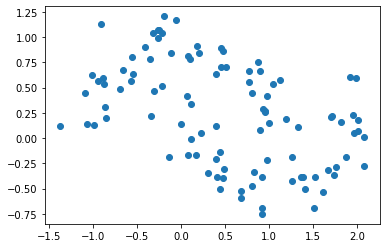

In [97]:
# scatter plot
plt.scatter(X[:,0], X[:,1])

In [110]:
def plot_plot(axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'rs')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
    plt.xlabel('$X_1$', fontsize=15)
    plt.ylabel('$X_2$', fontsize=15, rotation=0)
    plt.axis(axes)

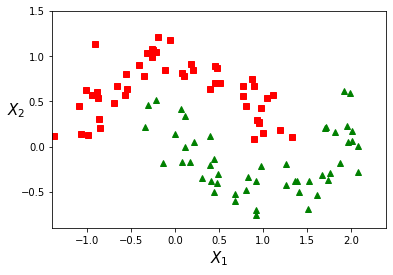

In [111]:
# differentiating based on column1 and column1
axes = [-1.4,2.4, -0.9,1.5]
plot_plot(axes)

In [99]:
ploy_clf = Pipeline([
    ('PolynomialFeatures',PolynomialFeatures(degree=3)),
    ('standard',StandardScaler()),
    ('SVM',LinearSVC(C=1, loss='hinge', random_state=42))
])

In [100]:
ploy_clf.fit(X,y)

Pipeline(steps=[('PolynomialFeatures', PolynomialFeatures(degree=3)),
                ('standard', StandardScaler()),
                ('SVM', LinearSVC(C=1, loss='hinge', random_state=42))])

In [115]:
def plot_contor(axes, ploy_clf):
    x0 = np.linspace(axes[0], axes[1], len(X[:,0]))
    x1 = np.linspace(axes[0], axes[1], len(X[:,0]))
    x0, x1 = np.meshgrid(x0, x1)
    X_ = np.c_[x0.ravel(), x1.ravel()]
    y_pred = ploy_clf.predict(X_).reshape(x0.shape)
    y_decision = ploy_clf.decision_function(X_).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)

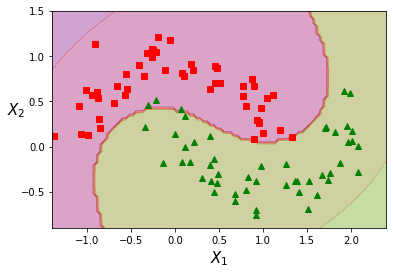

In [116]:
plot_plot(axes)
plot_contor(axes, ploy_clf)

#### Polynomial Kernel

In [8]:
from sklearn.svm import SVC

In [9]:
poly_kernel = Pipeline([
    ('scaler',StandardScaler()),
    ('SVC',SVC(kernel='poly',degree=3, coef0=1, C=5))
])

In [10]:
poly_kernel.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=5, coef0=1, kernel='poly'))])

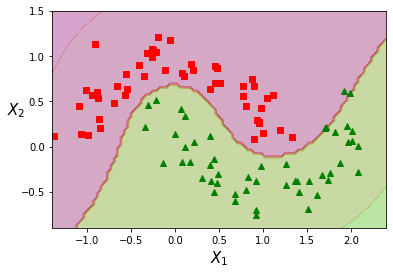

In [117]:
plot_plot(axes)
plot_contor(axes, poly_kernel)

#### Guassian RBF Kernel

In [11]:
guassian_kernel = Pipeline([
    ('scaler',StandardScaler()),
    ('SVC_g',SVC(kernel='rbf',gamma=5, C=1e-3))
])

In [12]:
guassian_kernel.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC_g', SVC(C=0.001, gamma=5))])

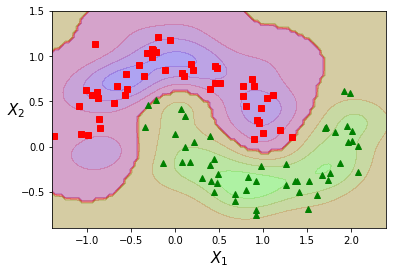

In [118]:
plot_plot(axes)
plot_contor(axes, guassian_kernel)